In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pymc as pm 
import arviz as az

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
from thesis_tools.utils.data import *
from thesis_tools.models.bayesian_multivariate_time_series import *

In [3]:
df = read_panel_data(AGGREGATE_TYPE='sub_region')

In [4]:
df = df[df['group'] == 'U.S.']

In [7]:
gpd_model = Multivariate_GeneralisedPareto_TimeSeries(
    df,
    independent_variables=['log_change_SPX']
)

In [8]:
gpd_model.fit(nuts_sampler='nutpie', cores=8)

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/pytensor/link/numba/dispatch/basic.py:379: UserWarning: Numba will use object mode to run AdvancedSetSubtensor's perform method
  warnings.warn(
/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/pytensor/link/numba/dispatch/basic.py:379: UserWarning: Numba will use object mode to run AdvancedSetSubtensor's perform method
  warnings.warn(
/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/pytensor/link/numba/dispatch/basic.py:379: UserWarning: Numba will use object mode to run AdvancedSetSubtensor's perform method
  warnings.warn(
/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/pytensor/link/numba/dispatch/basic.py:379: UserWarning: Numba will use object mode to run AdvancedSetSubtensor's perform method
  warnings.warn(
/Users/philipphocker/Documents/G

In [9]:
# running times: 
# 2 regions, 1 covariate, gamma fixed -> 6 minutes
# 2 regions, 2 covariates, gamma fixed -> 7 minutes
# 2 regions, 3 covariates, gamma fixed -> 10 minutes
# 1 region, 1 covariate, gamma fixed, epsilon -> 4 minutes
# 1 region, 1 covariate, common gamma, epsilon, 1000 iterations -> 4 minutes
# 2 sub_regions, 3 covariates, common gamma, epsilon, 1000 iterations -> 

In [12]:
gpd_model.trace 

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

Warmup iterations saved (warmup_*).

In [13]:
summary = az.summary(gpd_model.trace)

In [14]:
summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_log_change_SPX[0],0.212,0.420,-0.510,0.897,0.030,0.023,166.0,115.0,1.03
beta_variance_log_change_SPX[0],1.384,1.094,0.007,3.324,0.020,0.015,2880.0,2303.0,1.01
beta_variance_log_change_SPX_log__[0],-0.010,0.906,-1.660,1.593,0.018,0.016,2880.0,2303.0,1.01
epsilon_U.S._2002,-0.108,0.179,-0.480,0.189,0.008,0.006,528.0,782.0,1.01
epsilon_U.S._2003,-0.015,0.172,-0.345,0.289,0.008,0.006,442.0,533.0,1.02
...,...,...,...,...,...,...,...,...,...
sigma_epsilon_U.S._2021_log__,-0.140,0.385,-0.858,0.567,0.014,0.010,646.0,451.0,1.01
sigma_epsilon_U.S._2022,0.885,0.324,0.296,1.476,0.006,0.005,2647.0,2013.0,1.00
sigma_epsilon_U.S._2022_log__,-0.192,0.380,-0.911,0.517,0.008,0.007,2647.0,2013.0,1.00
sigma_epsilon_U.S._2023,0.898,0.346,0.277,1.541,0.013,0.009,653.0,370.0,1.01


/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (73), generating only 20 plots
  warnings.warn(


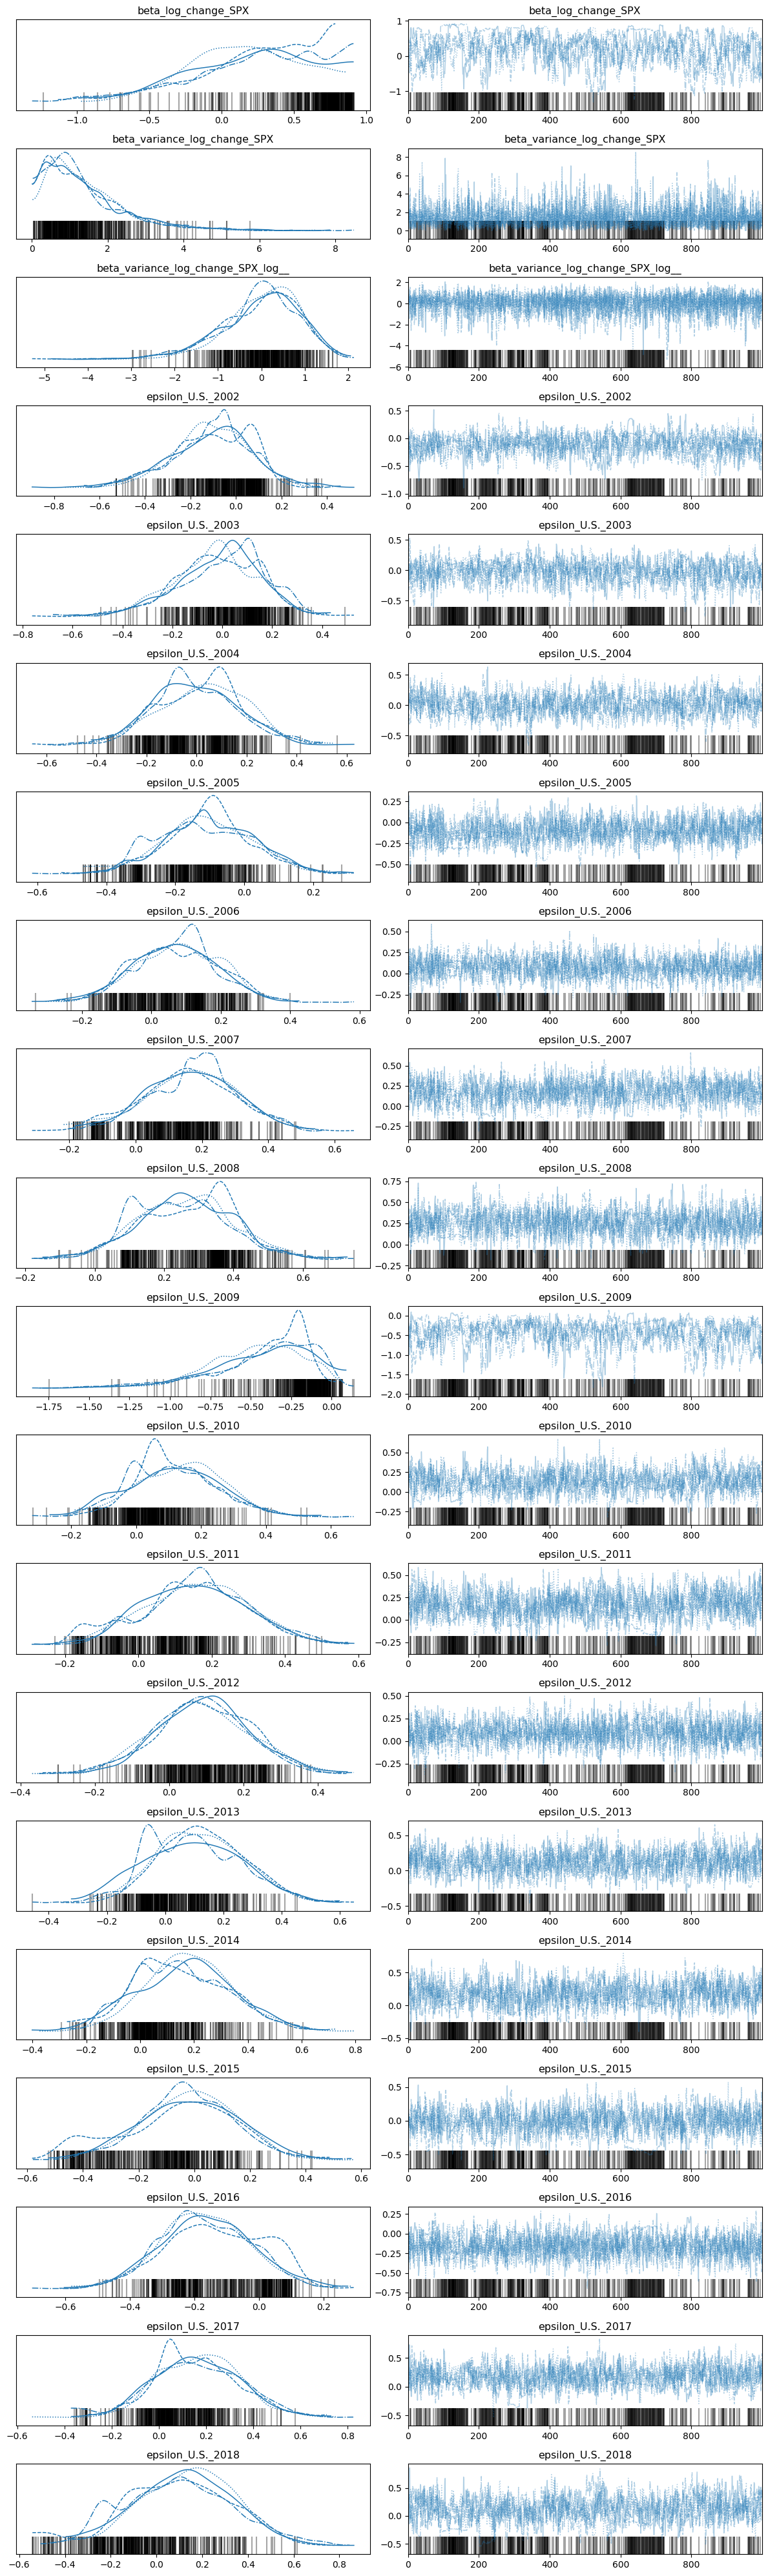

In [15]:
az.plot_trace(gpd_model.trace)
plt.tight_layout()